In [153]:
#https://larevueia.fr/machine-learning-pour-la-classification-automatique-de-musiques-avec-python/

In [42]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import librosa
from sklearn import preprocessing
from sklearn.svm import SVC


In [160]:
zcr = [] #zero crossing rate

mean_spectral_centroids = [] # moyenne du Spectral centroid

rolloff_point = [] #calcul du spectral rolloff point

mfcc = [ [] for _ in range(20) ] #liste qui contiendra les listes de mfcc (mfcc1, mfcc2,...)



In [32]:
def calcul_features_saving_csv(path_files, path_saved_features): #paths have to be string and without 'csv'
    directory = path_files
    zcr = [] #zero crossing rate
    mean_spectral_centroids = [] # moyenne du Spectral centroid
    rolloff_point = [] #calcul du spectral rolloff point
    mfcc = [ [] for _ in range(20) ] #liste qui contiendra les listes de mfcc (mfcc1, mfcc2,...)

    #adding filename in a list    
    filesnames = []

    for filename in os.listdir(directory):
        sound_file = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(sound_file):
            filesnames.append(sound_file)

    # iterate over files in that directory
    for filename in filesnames:
        #loading the audio
        audio = librosa.load(filename)[0]

        # Calcul du ZCR
        zcr0 = librosa.zero_crossings(audio)
        zcr.append(sum(zcr0))

        # Calcul de la moyenne du Spectral centroid
        spectral_centroids = librosa.feature.spectral_centroid(audio)[0]
        mean_spectral_centroids.append(np.mean(spectral_centroids))

        # Calcul du spectral rolloff point

        rolloff = librosa.feature.spectral_rolloff(audio)
        rolloff_point.append(np.mean(rolloff))

        # Calcul des moyennes des MFCC

        mfcc0 = librosa.feature.mfcc(audio) #liste de 20 liste (mfcc1, mfcc2, ...)

        for i in range(len(mfcc0)):
            mfcc[i].append(np.mean(mfcc0[i]))

    #checking if there is no error of list size
    n = len(filesnames)

    assert len(zcr) == n
    assert len(rolloff_point) == n
    assert len(mean_spectral_centroids) == n

    for i in range(len(mfcc)):
        assert len(mfcc[i]) == n

    #preparing dictionnary to create the dataframe
    dico1 = {'Filesnames' : filesnames,
    'zcr': zcr,
    'spectral_c':mean_spectral_centroids,
    'rolloff': rolloff_point
    }
    dico2 = {
        'mfcc' + str(i): mfcc[i-1] for i in range(1,21)
    }

    data_features_dico = dico1 | dico2

    data_features_df = DataFrame(data_features_dico, columns= ['Filesnames', 'zcr', 'spectral_c', 'rolloff', 'mfcc1', 'mfcc2', 'mfcc3',
                'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
                'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15',
                'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20'])

    export_csv_features = data_features_df.to_csv (path_saved_features + '.csv' , index = None, header=True, encoding='utf-8')

    #labelisation of the dataset
    labels = []
    for audio in filesnames:
        if audio[len(directory)+1:len(directory)+6] == 'Autre':
            labels.append(-1)
        else:
            labels.append(1)

    #adding the column of the labels in the dataframe
    data_features_df_labels = data_features_df.assign(Labels = labels) 

    #saving csv with labels
    path_csv_saved_labels = path_saved_features + '_labels.csv'
    export_csv_features_labels = data_features_df_labels.to_csv (path_csv_saved_labels, index = None, header=True, encoding='utf-8')  
    
    

            

In [33]:
%%capture

calcul_features_saving_csv('Dataset/Test', 'features_dataset_test')

In [34]:
%%capture

calcul_features_saving_csv('Dataset/Validation', 'features_dataset_valid')


In [35]:
%%capture

calcul_features_saving_csv('Dataset/Training', 'features_dataset_train')

In [16]:
directory = 'Dataset/Test'

On normalise les features 

In [4]:
#je recupere le dataframe avec le fichier csv sauvegardé

data_features_df_save = pd.read_csv('data_features.csv')

In [6]:
data_features_array = data_features_df_save.to_numpy(dtype=None, copy=False)

In [8]:
data_features_array_without_name = data_features_array[:,1:]

on normalise

In [12]:
scaler = preprocessing.StandardScaler().fit(data_features_array_without_name)

In [14]:
data_features_array_wn_scaled = scaler.transform(data_features_array_without_name)

In [3]:
X_valid_labels= pd.read_csv('Features/features_dataset_valid_labels.csv')

In [4]:
X_valid_labels

,Filesnames,zcr,spectral_c,rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,Labels
0,Dataset/Validation\Autre30206-7-0-21.wav,10959,2683.083290,6321.613219,-90.350395,88.109710,-4.920027,17.345710,7.855347,28.227303,...,6.559641,-10.308622,8.019948,-6.281759,7.355222,-6.512676,10.237149,-6.645456,3.525170,-1
1,Dataset/Validation\Autre30206-7-0-22.wav,9048,2450.787340,5916.527615,-96.280520,95.443720,0.574089,23.737953,7.023583,24.063590,...,9.206121,-11.453058,5.499372,-8.222022,9.440063,-5.275709,9.127714,-6.780856,2.832562,-1
2,Dataset/Validation\Autre30206-7-0-23.wav,7701,2295.294175,5573.427763,-108.349320,100.231026,0.437415,26.474527,5.060572,22.199238,...,11.200376,-12.283750,4.886851,-8.809922,11.141310,-4.594834,9.953289,-5.673603,4.461297,-1
3,Dataset/Validation\Autre30206-7-0-24.wav,7474,2265.537135,5575.979385,-110.109310,102.516940,0.924570,25.751495,4.292773,21.832333,...,10.921161,-12.548664,5.718543,-9.726356,11.723586,-3.859441,11.635502,-4.488471,5.493496,-1
4,Dataset/Validation\Autre30206-7-0-25.wav,7247,2276.721121,5652.714759,-102.677900,102.584110,2.252736,26.579672,6.008401,20.785103,...,11.406626,-14.288684,7.064798,-10.205610,10.927632,-4.854488,12.470791,-2.777649,6.298272,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,Dataset/Validation\Feu4_48_7.wav,14550,3991.143821,8370.005842,-75.487144,41.695680,53.273647,30.901365,12.680204,29.763931,...,7.996627,-7.497741,5.499549,-8.121254,4.812844,-8.524941,5.230054,-7.910595,3.918795,1
1400,Dataset/Validation\Feu4_48_8.wav,11794,3741.044416,8268.003184,-79.036026,43.589645,56.520264,31.430054,13.485960,30.167944,...,9.303316,-6.577608,7.312525,-6.936003,6.288931,-7.224506,6.504650,-6.528429,5.023506,1
1401,Dataset/Validation\Feu4_48_9.wav,14285,3909.794147,8337.519334,-70.064510,42.779280,55.104860,30.809813,12.402481,29.348484,...,8.387933,-7.061485,5.677048,-7.776007,5.424340,-7.380198,5.853923,-7.083721,4.290222,1
1402,Dataset/Validation\Feu4_49_0.wav,13915,3849.767418,8290.718846,-80.287186,42.907326,54.485184,32.152283,12.917300,30.054668,...,8.856607,-6.999173,6.434687,-7.551690,5.242069,-7.617199,5.641437,-7.363252,4.633782,1


Construction de la matrice de corrélation

In [28]:
df = pd.read_csv('Features/features_dataset_train.csv').iloc[:,1:25]

Text(0.5, -0.15, 'Matrice de corrélation')

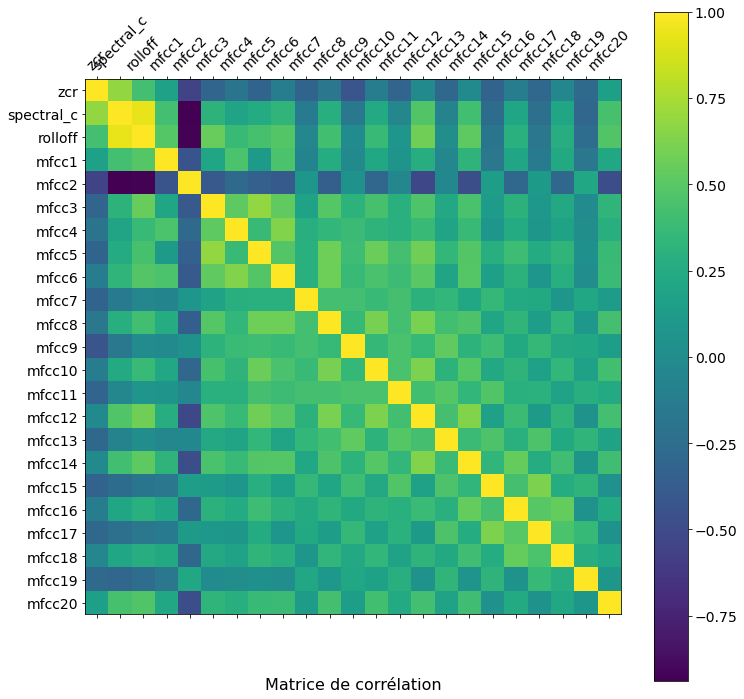

In [29]:
f = plt.figure(figsize=(12, 12))

plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matrice de corrélation', fontsize=16, y=-0.15)

In [30]:
df.var()

zcr           4.067909e+07
spectral_c    8.542491e+05
rolloff       4.116677e+06
mfcc1         9.927443e+03
mfcc2         2.153445e+03
mfcc3         8.148724e+02
mfcc4         3.358508e+02
mfcc5         2.322336e+02
mfcc6         1.404819e+02
mfcc7         6.935128e+01
mfcc8         8.333725e+01
mfcc9         4.868396e+01
mfcc10        3.365866e+01
mfcc11        3.017083e+01
mfcc12        3.962067e+01
mfcc13        2.888899e+01
mfcc14        2.884179e+01
mfcc15        2.232073e+01
mfcc16        2.585501e+01
mfcc17        2.272880e+01
mfcc18        1.782484e+01
mfcc19        1.229456e+01
mfcc20        2.041688e+01
dtype: float64

Création de SVM utilisant différentes features

In [43]:
def create_SVM_classifier(features, kernel_ = "linear"):
    X_train_full = pd.read_csv('Features/features_dataset_train.csv').iloc[:,1:25]
    X_train = X_train_full.loc[:, features] 
    Y_train = pd.read_csv('Features/features_dataset_train_labels.csv').iloc[:,24]

    X_test_full = pd.read_csv('Features/features_dataset_test.csv').iloc[:,1:25]
    X_test = X_test_full.loc[:, features] 
    Y_test = pd.read_csv('Features/features_dataset_test_labels.csv').iloc[:,24]
    
    #creation SVM
    classifier = SVC(kernel = kernel_)
    classifier.fit(X_train, Y_train)
    #Prediction sur le Test set
    #y_pred = classifier.predict(X_test)
    perfo_train = classifier.score(X_train, Y_train)
    perfo_test = classifier.score(X_test, Y_test)
    
    print('precision sur data train: ', perfo_train)
    print('precision sur data test: ', perfo_test)
    return classifier
    

In [44]:
feas = ['zcr']
featss = ['zcr', 'rolloff', 'mfcc2', 'mfcc12']

In [45]:
classi = create_SVM_classifier(featss, 'linear')

precision sur data train:  0.9263329263329263
precision sur data test:  0.9914407988587732


In [ ]:
create_SVM_classifier(feas, 'linear')